## Home comfort

In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math
from datetime import datetime

### Importing and separating the data into columns

The information is all stored in a single column **'info'**, which needs to be 



In [9]:
import os
import pandas as pd
import json

# Define the source and target directories
source_folder = "/Users/joaop.cardoso/MestradoCD/VI/Projecto VI/dataset"
target_folder = "/Users/joaop.cardoso/MestradoCD/VI/Projecto VI/VI---Home-Comfort/proc_dataset"

# List all CSV files in the source folder
csv_files = [f for f in os.listdir(source_folder) if f.endswith('.csv')]

# Loop through each file and apply the transformation
for i, file_name in enumerate(csv_files, start=1):
    # Load the CSV file
    file_path = os.path.join(source_folder, file_name)
    hc = pd.read_csv(file_path)
    
    # Process the 'date' and 'info' columns
    hc['date'] = pd.to_datetime(hc['date'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
    hc['info'] = hc['info'].apply(lambda x: json.loads(x) if pd.notnull(x) else {})
    
    # Expand the 'info' dictionary into separate columns
    hc_expanded = pd.json_normalize(hc['info'])
    hc_final = pd.concat([hc[['date']], hc_expanded], axis=1)
    
    # Define the new file name with an incremented prefix
    new_file_name = f"{str(i).zfill(2)}-{file_name}"
    new_file_path = os.path.join(target_folder, new_file_name)
    
    # Save the processed file
    hc_final.to_csv(new_file_path, index=False)

    print(f"Processed and saved: {new_file_name}")


Processed and saved: 01-sgh0201e9248493.csv
Processed and saved: 02-sgh02015d5c61cc.csv
Processed and saved: 03-sgh0201a8c87da4.csv
Processed and saved: 04-sgh020149c615c5.csv
Processed and saved: 05-sgh020125bce03a.csv
Processed and saved: 06-sgh02019d93db3f.csv
Processed and saved: 07-sgh0201a17a7a16.csv
Processed and saved: 08-sgh02018fe9be2c.csv
Processed and saved: 09-sgh020177a7a91d.csv
Processed and saved: 10-sgh0201f6cb55ed.csv
Processed and saved: 11-sgh020102d29c86.csv
Processed and saved: 12-sgh0201b9b7d045.csv
Processed and saved: 13-sgh020114a6a800.csv


Index(['date', 'info'], dtype='object')


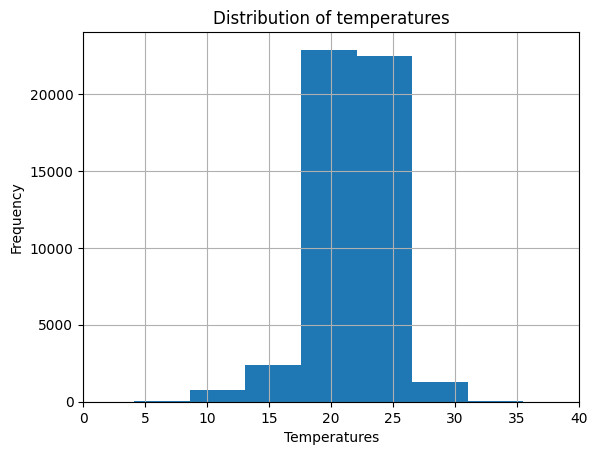

In [6]:
fig, ax = plt.subplots()
hc1_final['temperature'].hist(bins = 30, ax = ax)
print(hc1.columns)
ax.set(title = 'Distribution of temperatures', xlabel = 'Temperatures', ylabel = 'Frequency', xlim = (0, 40))

plt.show()

In [ ]:

#encoded_hc1 = pd.get_dummies(hc1, drop_first = True) # drop_first avoids multicollinearity (correlation btw dummy variables)

#encoded_hc1.info()

numeric_hc1 = hc1.select_dtypes(include = 'number')

non_num_hc1 = hc1.select_dtypes(exclude = 'number')

# Compute the correlation matrix for the variables in a single individual dataset
corr_matrix = numeric_hc1.corr()

In [ ]:
# Display the correlation matrix as as heatmap 
fig, ax = plt.subplots(figsize = (12,10))
# Create the heatmap using the ax object (can't use ax)
heatmap = ax.matshow(corr_matrix, cmap = 'coolwarm')

# Create the colorbar
fig.colorbar(heatmap)

# Set the title and axis labels
ax.set_title('Correlation Matrix', pad = 20)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
ax.set_yticklabels(corr_matrix.columns)

In [ ]:
# Histograms for numerical variables

num_vars = len(numeric_hc1.columns)
num_cols = 5
num_rows = math.ceil((num_vars / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize = (16, num_rows * 4))
fig.tight_layout(pad = 1)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histogram for each variable
for i, column, in enumerate(numeric_hc1.columns):
    ax = axes[i]
    hc1[column].hist(bins = 30, ax = ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

#Hide any empty subplot if the number of variables is not a perfect grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.show()